<a href="https://colab.research.google.com/github/aryarajat/Bike-Rental-Demand/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset 
bike_df=pd.read_csv('/content/drive/MyDrive/Alma Better/Data/SeoulBikeData.csv',encoding = 'unicode_escape')

In [4]:
# Make a copy of dataset for the catboost algorithm
cat_bike_df=bike_df.copy()

Here, we take a look at the dataset and find out the numerical and categorical features of the dataset. Also, find the information about the mean value, maximum value, and min value of each numerical column.

In [5]:
# First look of the dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Take a look of last 5 observation of our dataset
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Checking the shape of the dataframe
bike_df.shape

(8760, 14)

In [8]:
# Columns name
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Information about the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Finding out the various statistics for the numerical columns
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Finding out the various stastistics for all varibles of the dataset
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,10/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### **Analyzing the Categorical Columns**





In [12]:
# Checking the value counts for the categorical varible Seasons
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [13]:
# Checking the value counts for the categorical varible Holiday
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [14]:
# Checking the value counts for the categorical varible Functioning Day
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [15]:
# Here, we use gorupby function to count the total number of rented bikes for each season 
bike_df.groupby(['Seasons'])['Rented Bike Count'].sum().sort_values(ascending=True)

Seasons
Winter     487169
Spring    1611909
Autumn    1790002
Summer    2283234
Name: Rented Bike Count, dtype: int64

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on a dataset( import from CSV, Jason, and Html files) to summarize their main characteristics, often with visual methods and check assumptions with the help of summary statistics and graphical representations. EDA is used for analyzing what the data can tell us before the modeling or by applying any set of instructions/code. When you are working with the datasets, it is not easy to determine the important characteristics of the data by looking at the column of numbers or a whole spreadsheet/dataset. It may be tedious, boring, and/or overwhelming to determine experiences by seeing plain numbers. . Exploratory data analysis techniques have been devised as an aid in this situation.

In [16]:
# Checking the null values in the dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [17]:
# Checking the duplicate data in our dataset
bike_df.duplicated().sum()

0

As we can see that there are no missing values as well as no duplicated observations.

In [18]:
# Total number of rented bikes
print('Total Rented Bike Count:', bike_df['Rented Bike Count'].sum())

Total Rented Bike Count: 6172314


In [19]:
# We convert as datetime the series 'Date' and adding the month column to dataset
bike_df['Date']=pd.to_datetime(bike_df['Date'])
bike_df['Month']= pd.DatetimeIndex(bike_df['Date']).month

In [20]:
# Numerical columns
bike_df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month'],
      dtype='object')

In [21]:
# Here we find the correlation matrix
bike_df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.684858e-18
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02


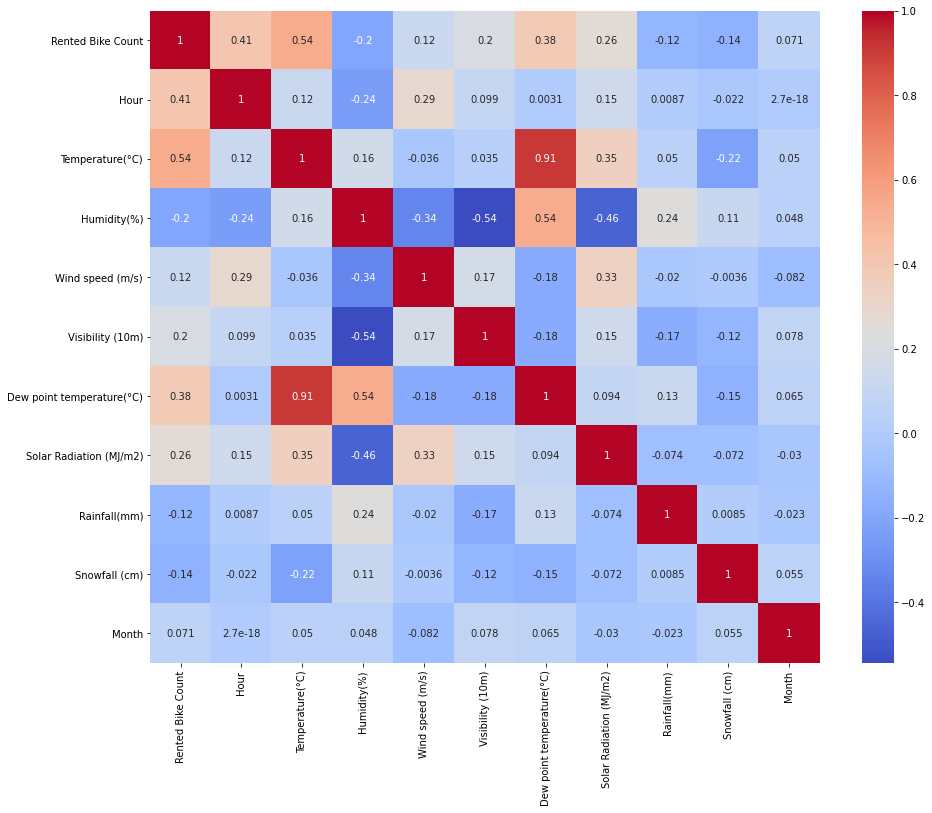

In [22]:
#Ploting the heatmap for the correlation matrix
plt.figure(figsize=(15,12))
sns.heatmap(bike_df.corr(),annot=True, cmap='coolwarm')

##Observations:


*   It is clear from the heatmap, the variables Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   As we can see that the independent variable Temperature and Dew point temperatures are highly correlated.




# **DATA VISUALIZATION**
*   Data visualization is the process of translating large data sets and metrics into
charts, graphs and other visuals. The resulting visual representation of data
makes it easier to identify and share real-time trends, outliers, and new
insights about the information represented in the data.
*  The field of data visualization combines both art and data science. While a
data visualization can be creative and pleasing to look at, it should also be
functional in its visual communication of the data.

In [23]:
# Rented Bike count month wise
Rented_bike_per_month = pd.DataFrame(bike_df['Rented Bike Count'].groupby(by=bike_df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_month

,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


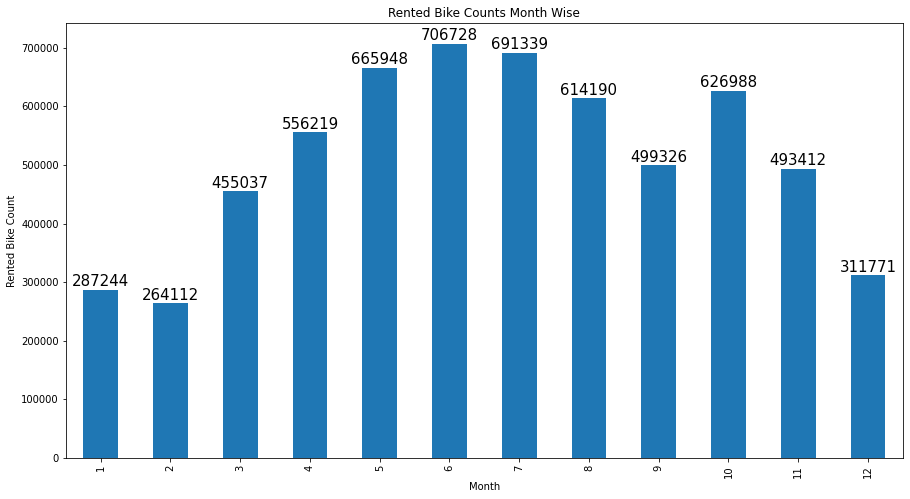

In [24]:
# Ploting the graph
ax=bike_df.groupby('Month')['Rented Bike Count'].sum().plot.bar(figsize=(15,8))
ax.set_xlabel('Month')
ax.set_ylabel('Rented Bike Count')
ax.set_title('Rented Bike Counts Month Wise')
# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Observation:


*   The number of rented bikes count in the month of June is 896887 which is higher than all other months.
*   The number of rented bike counts in January is 150006 which is the least in all months.


Text(0, 0.5, 'Rented bikes')

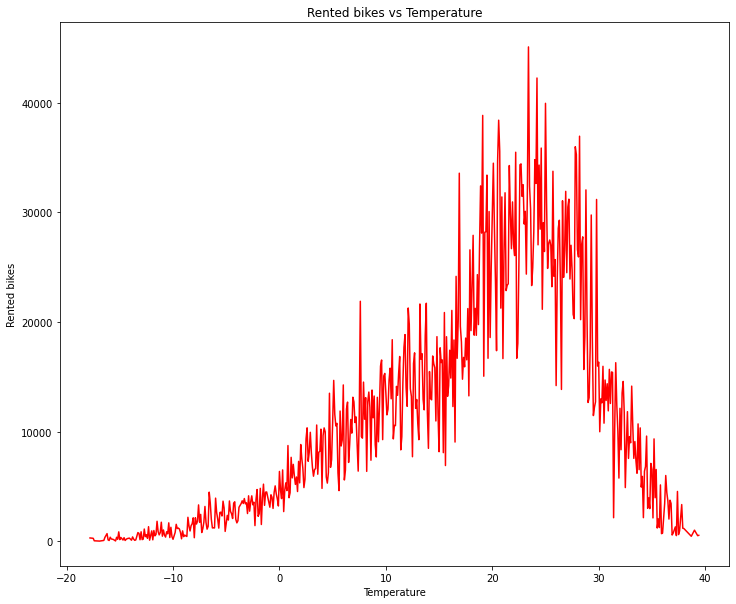

In [25]:
# Plot the graph between the temperature and rented bike counts
tem_rent=bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum()
tem_rent.plot(color='r',figsize=(12, 10))
plt.title('Rented bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bikes')

#Observation:


*  From the graph, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.
*   From the above graph, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.  


In [26]:
# Rented bike counts seasons wise
season_count=bike_df.groupby('Seasons')['Rented Bike Count'].sum()
season_df=pd.DataFrame(season_count)

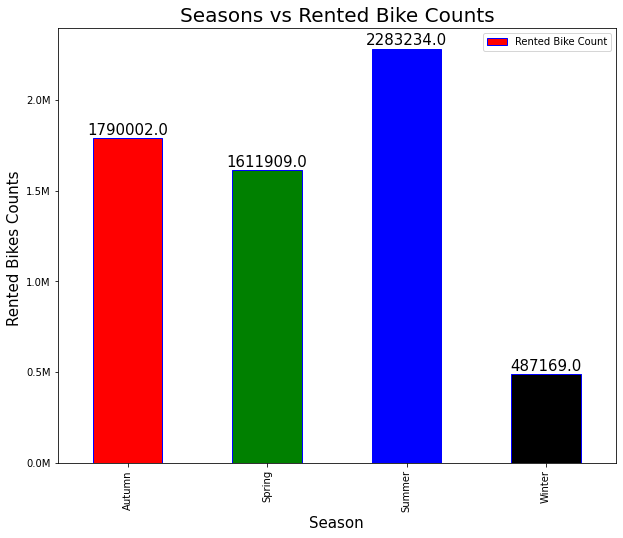

In [27]:
# Plot the bar plot for season count
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
ax=season_df.plot.bar(figsize=(10, 8),color='rgbkymc',edgecolor='blue')

# Set the title
ax.set_title('Seasons vs Rented Bike Counts', fontsize = 20)

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

# Set x and y-labels
ax.set_xlabel("Season", fontsize = 15)
ax.set_ylabel("Rented Bikes Counts ", fontsize = 15)
ax.yaxis.set_major_formatter(formatter)



## Observation:


*   From the chart, we can see that the highest number of bikes are rented in the summer season.
*   In the winter season, people prefer fewer bikes as compared to other seasons.











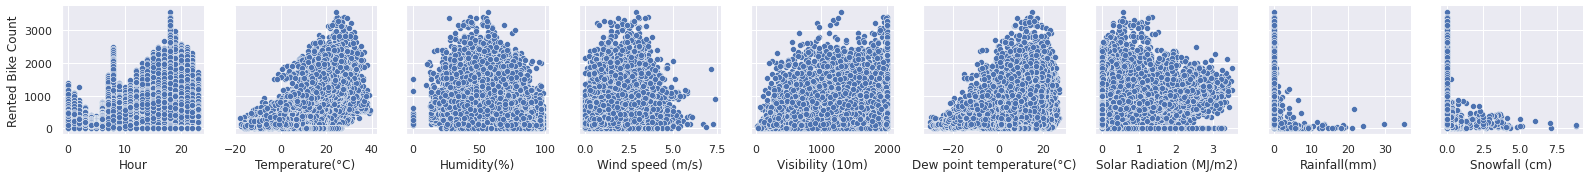

In [28]:
# Here we plot the Pairpolt for dependent and independent variable
sns.set(rc={'figure.figsize':(15,12)})
g=sns.pairplot(x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
             ,y_vars='Rented Bike Count',data=bike_df,palette='Dark2')

##Observation:
The given problem is solved by the regression model but from the above pairplot, we can see that the relationship between the independent variable and the dependent variable is not linear. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

In [29]:
# Bike Rented on Holidays and No-Holidays
holiday_count=bike_df.groupby(['Holiday'])['Rented Bike Count'].sum()
holiday_df=pd.DataFrame(holiday_count)

In [30]:
holiday_df

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


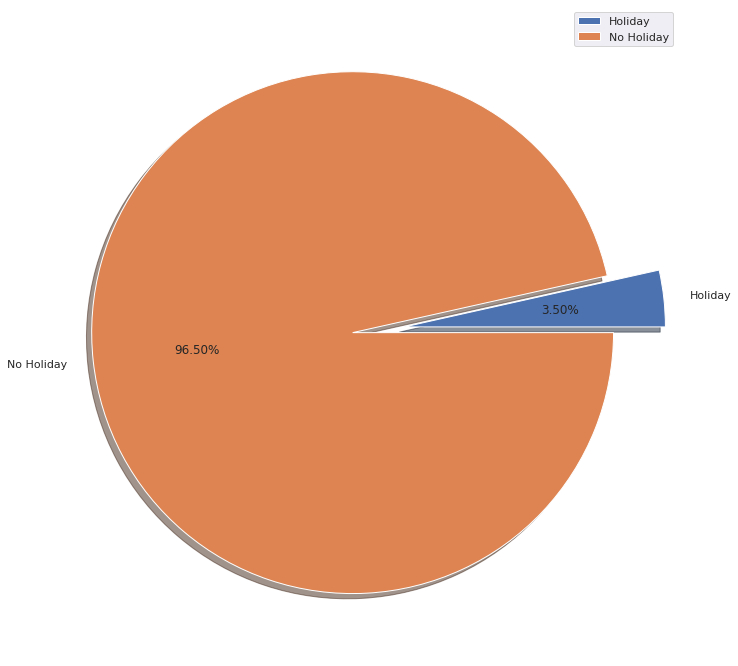

In [31]:
# Ploting the graph
myexplode = [0.2, 0]
plt.pie(holiday_df, labels=holiday_df.index, autopct='%1.2f%%',shadow = True, explode = myexplode)
plt.legend(holiday_df.index)


## Observation:


*   Very few bikes are hired on the holidays.
*   The majority of the bikes are rented on days other than holidays.




Text(0, 0.5, 'Counts')

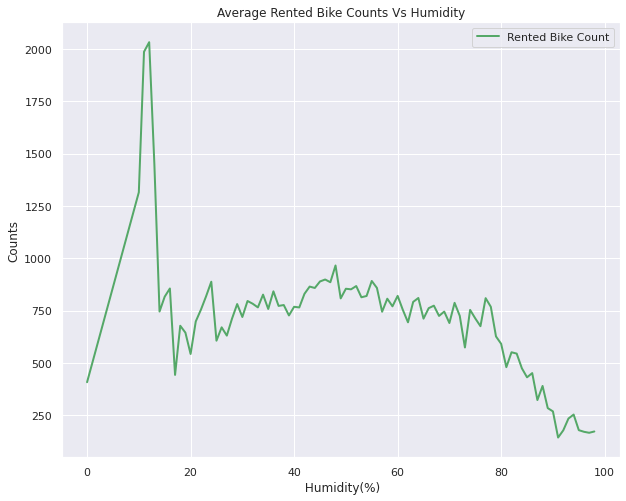

In [32]:
# Plot the graph between the Humidity and Average Rented Bike counts
humidity_rent=bike_df.groupby('Humidity(%)')['Rented Bike Count'].mean()
humidity_df=pd.DataFrame(humidity_rent)
humidity_df.plot(kind='line', linewidth=2, markersize=12,animated=True, color='g',figsize=(10, 8))
plt.title('Average Rented Bike Counts Vs Humidity')
plt.xlabel(' Humidity(%)')
plt.ylabel('Counts')

##Observation:



*   When humidity levels are less than 20% the rented bike counts are quite high.
*   When humidity levels are greater than 50% the rented bike count decreased rapidly.




Text(0, 0.5, 'Counts')

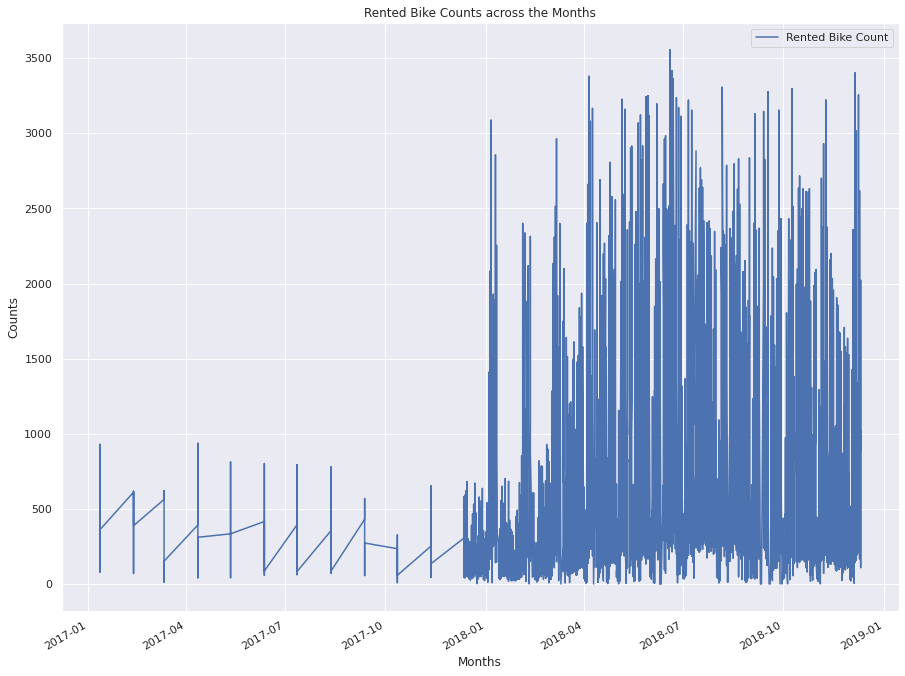

In [33]:
# Plot the graph between the months and Rented Bike counts

bike_df.plot(x='Date',y='Rented Bike Count',kind='line')
plt.title('Rented Bike Counts across the Months')
plt.xlabel('Months')
plt.ylabel('Counts')

##Observations:
From the graph, we can see that the demand for bikes on rent increases between April to autumn.





In [34]:
# Rented bike count on the basis of Rainfall
rainfall_rent=bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].mean()
rainfall_df=pd.DataFrame(rainfall_rent)


In [35]:
# Checking the rainfall df
rainfall_df.head(20)

,Rented Bike Count
Rainfall(mm),
0.0,739.311103
0.1,329.978261
0.2,185.300000
0.3,155.666667
0.4,134.187500
0.5,246.586207
0.7,165.000000
0.8,96.000000
0.9,489.333333


Text(0, 0.5, 'Counts')

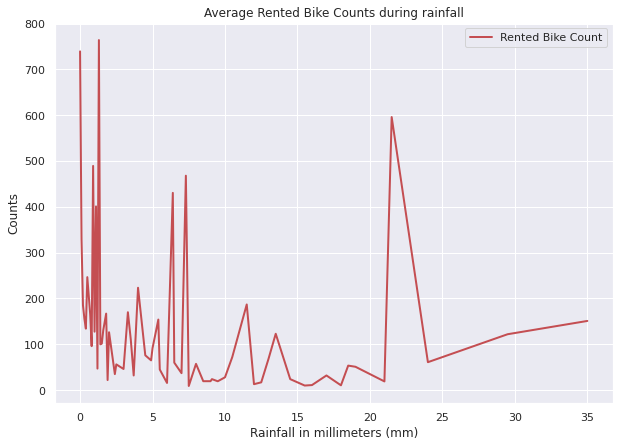

In [36]:
# Plot the graph between the rainfall and Average Rented Bike counts
rainfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10, 7))
plt.title('Average Rented Bike Counts during rainfall')
plt.xlabel('Rainfall in millimeters (mm)')
plt.ylabel('Counts')

##Obervation:
From the graph, we can see that when rainfall is less than 8mm people take more bikes on rent. But, we can also see the peak in between 20mm to 25mm that is not easy to digest. 
For this interval, we check the data frame and try to find a more precise reason. 



In [37]:
bike_df.loc[(bike_df['Rainfall(mm)']>20)&(bike_df['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6
5132,2018-02-07,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,2
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8


You can see that it is raining in summer, the temperature is not bad, and it is not a holiday, so even though the rain is so important, we still have so many rented bikes.

In [38]:
# Rented bike count on the basis of Visibility
visibility_rent=bike_df.groupby('Visibility (10m)')['Rented Bike Count'].mean()
visibility_df=pd.DataFrame(visibility_rent)


Text(0, 0.5, 'Counts')

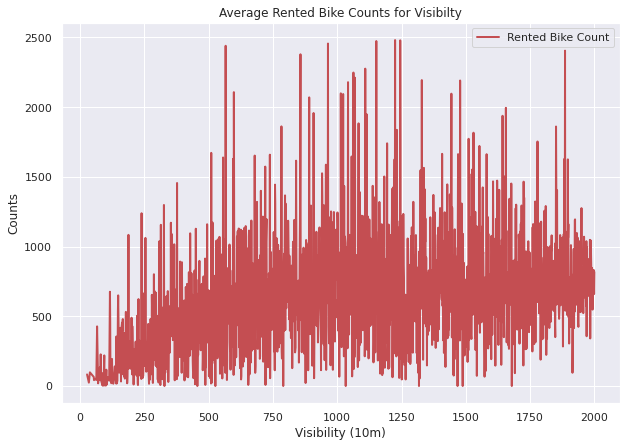

In [39]:
# Plot the for visibility  and Average Rented Bike counts
visibility_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10,7))
plt.title('Average Rented Bike Counts for Visibilty')
plt.xlabel('Visibility (10m)')
plt.ylabel('Counts')

##Observation:
It is clearly visible from the graph, the rented bike count increase with an increase in invisibility.

Text(0, 0.5, 'Counts')

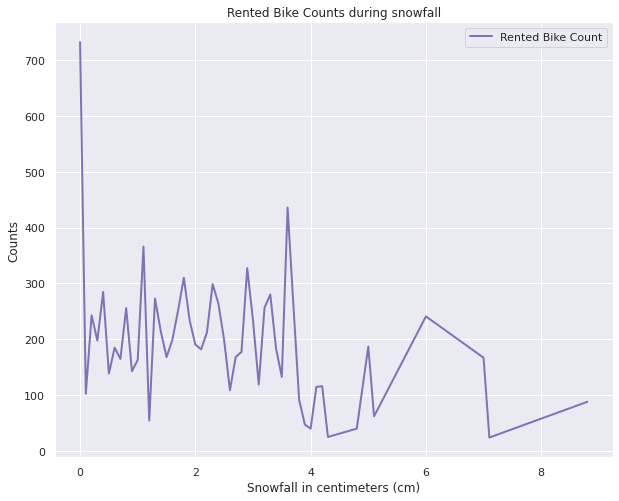

In [40]:
# Plot the graph between the snowfall and Rented Bike counts
snowfall_rent=bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].mean()
snowfall_df=pd.DataFrame(snowfall_rent)
snowfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='m',figsize=(10, 8))
plt.title('Rented Bike Counts during snowfall')
plt.xlabel('Snowfall in centimeters (cm)')
plt.ylabel('Counts')

## Observation:


*   Mostly bikes were taken on rent when snowfall is less than 4cm.
*   It is very difficult the drive bikes in snow so the usage of bikes decreases in the high snowfall.



Text(0, 0.5, 'Counts')

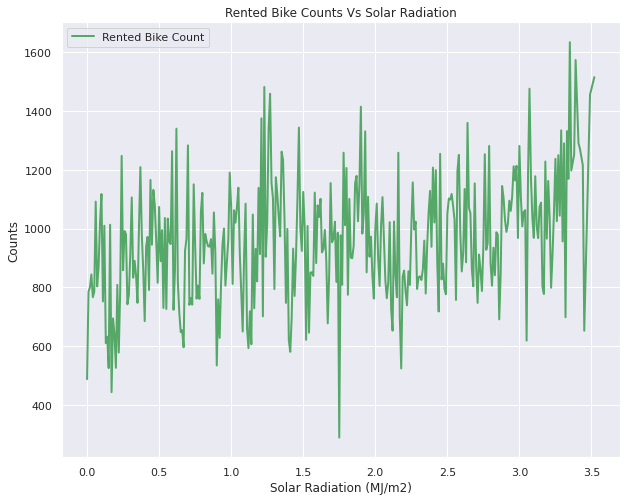

In [41]:
# Plot the graph between the solar radiation and Rented Bike counts
radiation_rent=bike_df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean()
radiation_df=pd.DataFrame(radiation_rent)
radiation_df.plot(kind='line', linewidth=2, markersize=12,animated=True, color='g',figsize=(10, 8))
plt.title('Rented Bike Counts Vs Solar Radiation')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Counts')

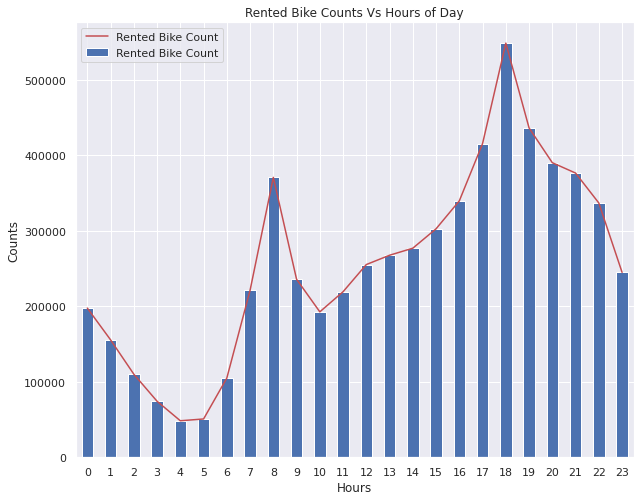

In [42]:
# Plot the graph between the Rented Bike Counts and Hours of Day
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='b',figsize=(10, 8))
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot(color='r',figsize=(10, 8))
plt.title('Rented Bike Counts Vs Hours of Day')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.legend()


##Obervation:


*   The usage of rented bikes is high in between 4 pm to 10 pm. It means people take bikes on rent while returning to their homes from their workplaces to avoid heavy traffic.
*   At 8 am in the morning the usage of rented bikes is higher than normal. It means people take bikes on rent to go to their workplace or dropping their children at school.



# **DATA PREPROCESSING**

### First we transform the categorical variables into the numerical variables

In [43]:
# Transforming the Holiday variable 
bike_df['Holiday']=bike_df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

In [44]:
# Transforming the Functioning Day variable 
bike_df['Functioning Day']=bike_df['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)


In [45]:
# Transforming the Seasons variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pd.get_dummies(bike_df['Seasons'])
bike_df=pd.concat([bike_df,one_hot_encoded_data],axis=1)


In [46]:
# Take a look of dataset after coverting categorical columns
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0,1


In [47]:
# Removing the column for the dataframe
bike_df.drop('Seasons',axis=1,inplace=True)

In [48]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

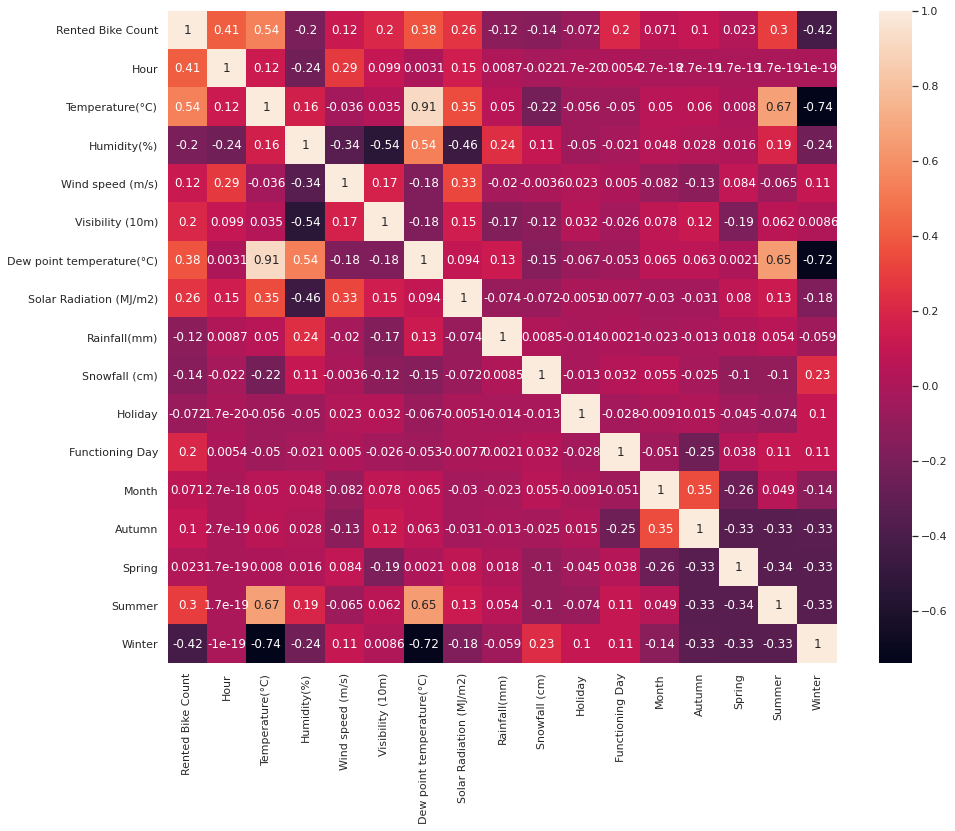

In [49]:
# Now we draw the heatmap for all the numerical columns
sns.heatmap(bike_df.corr(),annot=True)

## **Feature Selection**

In [50]:
# Data for independent and dependent set
X=bike_df.drop(['Date','Rented Bike Count','Dew point temperature(°C)'],axis=1)
y=bike_df.loc[:,'Rented Bike Count']

In [51]:
# Shape of independent and dependent dataset
print(X.shape)
print(y.shape)

(8760, 15)
(8760,)


In [107]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)


## **Scaling**

In [54]:
# Now we rescaling our data
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# **Fitting the Linear Regression** 

In [55]:
# Fitting the Linear Regression on training dataset
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Traning Data Store
regressor.score(X_train,y_train)

0.5543349453074262

In [57]:
# Predicting the train set results
y_pred_train = regressor.predict(X_train)

In [58]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [59]:
# Calculating the root mean squares error of y_test and y_predicted
rmse=math.sqrt(mean_squared_error(y_test, y_pred))
print('The Root Mean Squared Error:',rmse)

The Root Mean Squared Error: 441.3228706305085


In [60]:
# Calculating the  mean squares error of y_test and y_predicted
mse=(mean_squared_error(y_test, y_pred))
print('The Mean Squared Error:',mse)

The Mean Squared Error: 194765.87614155252


In [61]:
# Calulating thr R-Squared and Adjusted R-squared
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.532538977880207
Adjusted R2 :  0.5284998561453009


## **Observation**

* We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

* We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.



# **Fitting Lasso Regression**

In [62]:
# Fitting the Lasso Regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
# The lasso training score
lasso.score(X_train, y_train)

0.5544397020295178

In [64]:
# Performing the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [65]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " The r2_score is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  The r2_score is:  0.5517688296102349


In [66]:
# Lasso optimal model
optimal_model=lasso_regressor.best_estimator_

# Traning score

print('The training score:',optimal_model.score(X_train,y_train))

The training score: 0.5543912328185353


In [67]:
# Predicting the valus using lasso
y_pred_lasso = optimal_model.predict(X_test)

In [68]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 194675.69867365833
RMSE : 441.220691574702
R2 : 0.532755414414928
Adjusted R2 :  0.5287181628113704


# **Fitting Ridge Regression**

In [69]:
# Fitting Ridge regression and GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [70]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,  "The r2_score is:", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01} The r2_score is: 0.5517599965348358


In [71]:
# Optimal model for Ridge Regression
optimal_model=ridge_regressor.best_estimator_

In [72]:
# Predecting the output for test data
y_pred_ridge = optimal_model.predict(X_test)

In [73]:
# Traning score
optimal_model.score(X_train,y_train)

0.5544396738135561

In [74]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 194759.7475220308
RMSE : 441.31592711121453
R2 : 0.5325536872882539
Adjusted R2 :  0.5285146926507677


# **Fitting Decision Tree**

In [75]:
# For decision tree we use the standard scalar
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [76]:
# Fitting the Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='mse', max_leaf_nodes=9, max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
#checking the traning
regressor.score(X_train,y_train)

0.6536762573287773

In [78]:
# Predecting the result on the test data
y_pred=regressor.predict(X_test)

In [79]:
# Calcuting the R_squared for test data
r2_score(y_test,y_pred)

0.6236660214977983

In [80]:
# Applying Grid Search for Decision Tree
param = {'max_depth' : [1,4,5,6,7,10,15,20,8], 'max_leaf_nodes':[5,10,20,25,30,40,45]}

decision_tree=DecisionTreeRegressor()

gridSearch_decisionTree=GridSearchCV(decision_tree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)




GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8],
                         'max_leaf_nodes': [5, 10, 20, 25, 30, 40, 45]},
            

In [81]:
# Best params for decision tree
gridSearch_decisionTree.best_params_

{'max_depth': 15, 'max_leaf_nodes': 45}

In [82]:
# Score and optimal paramters
print('The best hyperparameter for Decision Tree :',gridSearch_decisionTree.best_params_)
print('The best score:',gridSearch_decisionTree.best_score_)

The best hyperparameter for Decision Tree : {'max_depth': 15, 'max_leaf_nodes': 45}
The best score: 0.7909457184402047


In [83]:
# Optimal Model for decision tree
optimal_DecisionTree=gridSearch_decisionTree.best_estimator_


In [84]:
# Predicting the Output value
y_pred_dt=optimal_DecisionTree.predict(X_test)

In [85]:
# Traning score
optimal_DecisionTree.score(X_train,y_train)

0.8192488068498688

In [86]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dt)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91621.18631010503
RMSE : 302.6899177543002
R2 : 0.7800983711888931
Adjusted R2 :  0.7781982995113779


#   **Fitting Random Forest**

In [87]:
from sklearn.ensemble import RandomForestRegressor


In [88]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[4,6,8]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90, 110]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50]   # To avoid the overfitting of data

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [89]:
# crearing an instance of the random forest
rf_model=RandomForestRegressor()

# Perform the gridsearch
rf_grid=GridSearchCV(estimator=rf_model, param_grid=grid_dict, scoring='r2',verbose=2, cv=5)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_sampl

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [90]:
# Find the best parameters for the RandomForestRegressor
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 125}

In [91]:
# Traning Score 
print('The best score:',rf_grid.best_score_)

The best score: 0.7582318632928804


In [92]:
# Optimal Model
rf_optimal_model=rf_grid.best_estimator_

In [93]:
# Making predictions on the test data
y_pred_rf=rf_optimal_model.predict(X_test)

In [94]:
# Training Score
rf_optimal_model.score(X_train,y_train)

0.8290710672891966

In [95]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 84707.26489279314
RMSE : 291.0451251830086
R2 : 0.7966925961969926
Adjusted R2 :  0.7949359078000773


## **Fitting GradientBoosting**

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch

# Number of trees
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[6,8,10]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50,60]   # To avoid the overfitting of data

# Learning rate
learning_rate=[0.15,0.1,0.05]

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
           'learning_rate':[0.15,0.1,0.05]}

In [98]:
# crearing an instance of the Gradient Boosting
gb_model=GradientBoostingRegressor()

# Perform the gridsearch
gb_grid=GridSearchCV(estimator=gb_model, param_grid=grid_dict, scoring='r2',verbose=2, cv=5)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.5s
[CV] learning_rate=0.15, max_depth=6, min

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed: 36.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [99]:
# Find the best parameters for the GradientBoosting
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 125}

In [100]:
# GradientBoosting Score
gb_grid.best_score_

0.8832439651106752

In [101]:
#optimal model
optimal_gb_model=gb_grid.best_estimator_

In [102]:
# Training Score
optimal_gb_model.score(X_train,y_train)

0.9390281842169098

In [103]:
# Making predictions on the test data
y_pred_gb=optimal_gb_model.predict(X_test)

In [104]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_gb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_gb)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 51414.79168092642
RMSE : 226.7483002823316
R2 : 0.8765984496494945
Adjusted R2 :  0.8755321920139775


## **Feature Importance**

In [108]:
importances = optimal_gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

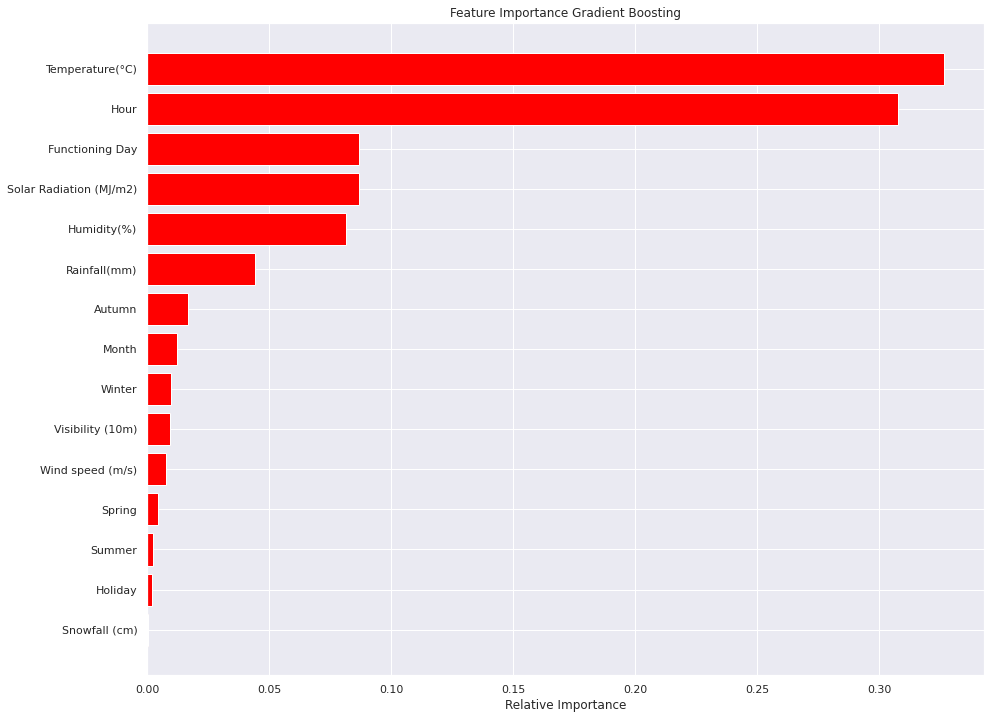

In [109]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='red', align='center')
plt.title('Feature Importance Gradient Boosting')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

# **Fitting CatBoost**

In [110]:
pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [111]:
cat_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [112]:
# Data for dependent and independent
X=cat_bike_df.drop(['Rented Bike Count','Date'],axis=1)
y=cat_bike_df['Rented Bike Count']

In [113]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 12)
(7008,)
(1752, 12)
(1752,)


In [115]:
#List of categorical columns
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day']
Location of categorical columns :  [9, 10, 11]


In [116]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [117]:
from catboost import CatBoostRegressor


In [118]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2')

In [119]:
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_search_results = cat_model.grid_search(grid, train_data, shuffle=False, verbose=3, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
19:	learn: 0.1001352	test: 0.1178078	best: 0.1178078 (19)	total: 394ms	remaining: 19.3s
20:	learn: 0.1343914	test: 0.1509730	best: 0.1509730 (20)	total: 415ms	remaining: 19.3s
21:	learn: 0.1695013	test: 0.1850925	best: 0.1850925 (21)	total: 436ms	remaining: 19.4s
22:	learn: 0.2015236	test: 0.2160855	best: 0.2160855 (22)	total: 442ms	remaining: 18.8s
23:	learn: 0.2334930	test: 0.2470040	best: 0.2470040 (23)	total: 472ms	remaining: 19.2s
24:	learn: 0.2640907	test: 0.2769239	best: 0.2769239 (24)	total: 495ms	remaining: 19.3s
25:	learn: 0.2906980	test: 0.3033832	best: 0.3033832 (25)	total: 522ms	remaining: 19.6s
26:	learn: 0.3167763	test: 0.3290207	best: 0.3290207 (26)	total: 545ms	remaining: 19.6s
27:	learn: 0.3421494	test: 0.3535175	best: 0.3535175 (27)	total: 567ms	remaining: 19.7s
28:	learn: 0.3670321	test: 0.3779018	best: 0.3779018 (28)	total: 575ms	remaining: 19.2s
29:	learn: 0.3882291	test: 0.3983608	best: 0.3983608 (29)	total: 597m

In [120]:
grid_search_results['params']

{'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [121]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2', depth=10, l2_leaf_reg= 5, learning_rate= 0.1)
cat_model.fit( train_data,
               eval_set=test_data, plot=True
             ,use_best_model=True )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1280887	test: 0.1226621	best: 0.1226621 (0)	total: 24.1ms	remaining: 24.1s
1:	learn: 0.2327577	test: 0.2256019	best: 0.2256019 (1)	total: 47.6ms	remaining: 23.8s
2:	learn: 0.3259962	test: 0.3169299	best: 0.3169299 (2)	total: 71.6ms	remaining: 23.8s
3:	learn: 0.4037722	test: 0.3917675	best: 0.3917675 (3)	total: 97.5ms	remaining: 24.3s
4:	learn: 0.4665719	test: 0.4526336	best: 0.4526336 (4)	total: 120ms	remaining: 23.9s
5:	learn: 0.5217631	test: 0.5051898	best: 0.5051898 (5)	total: 143ms	remaining: 23.6s
6:	learn: 0.5702999	test: 0.5512588	best: 0.5512588 (6)	total: 166ms	remaining: 23.6s
7:	learn: 0.6095213	test: 0.5894030	best: 0.5894030 (7)	total: 189ms	remaining: 23.4s
8:	learn: 0.6419379	test: 0.6216676	best: 0.6216676 (8)	total: 213ms	remaining: 23.4s
9:	learn: 0.6689037	test: 0.6473358	best: 0.6473358 (9)	total: 241ms	remaining: 23.8s
10:	learn: 0.6926077	test: 0.6712711	best: 0.6712711 (10)	total: 264ms	remaining: 23.7s
11:	learn: 0.7163408	test: 0.6952583	best: 0.695

In [122]:
cat_model.score(train_data)

0.9799461105347161

In [123]:
y_pred=cat_model.predict(test_data)

In [124]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 48276.544558471454
RMSE : 219.71924030105205
R2 : 0.8841306120415406
Adjusted R2 :  0.8833310532977214


## **Feature Importance**

In [125]:
importances = cat_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

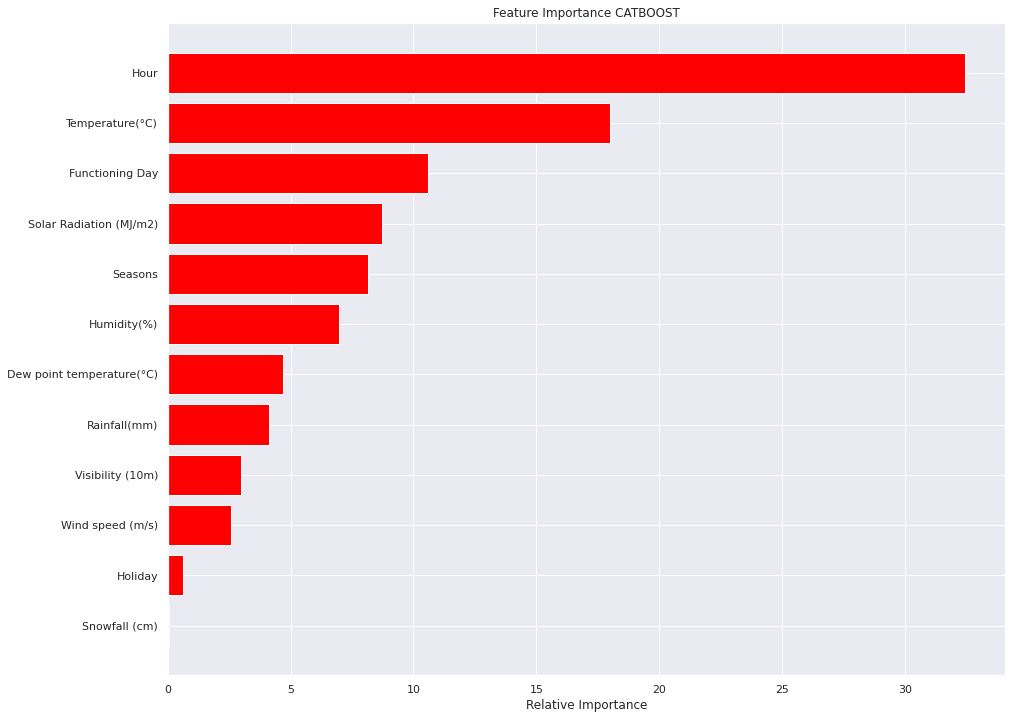

In [126]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='red', align='center')
plt.title('Feature Importance CATBOOST')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

## Observation: 
According to the Gradiend Boosting and CatBoost method Temperature and Hour are most important features

# **Model Selection and Validation**

In [127]:
evaluation_dict={'Model_Name':['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree', 'Random Forest','Gradient Boosting','CatBoost'],
                 'Training_score':[0.5543349453074262,0.5543912328185353,0.5544396738135561,0.8192488068498688,0.827681040959722,0.9390281842169098,0.9799461105347161], 
                 'MSE':[194765.87614155252,194675.69867365833,194759.7475220308,91621.18631010503,85089.39515746807,51417.0412812453,48276.544558471454],
                 'RMSE':[441.3228706305085,441.220691574702,441.14434363399425, 302.6899177543002,291.7008658839875,226.75326079517643,219.71924030105205],
                 'R-squared':[0.532538977880207,0.532755414414928,0.5325536872882539,0.7800983711888931,0.7957754385939944,0.876593050344004,0.8841306120415406 ], 
                 'Adjusted R-Squared':[0.5284998561453009,0.5287181628113704,0.5285146926507677,0.77832599191235,0.7940108254482051, 0.8755267460555017,0.8833310532977214]}

In [128]:
evaluation_df=pd.DataFrame(evaluation_dict)

In [129]:
# Model validation Scores
evaluation_df


,Model_Name,Training_score,MSE,RMSE,R-squared,Adjusted R-Squared
0,Linear Regression,0.554335,194765.876142,441.322871,0.532539,0.528500
1,Lasso Regression,0.554391,194675.698674,441.220692,0.532755,0.528718
2,Ridge Regression,0.554440,194759.747522,441.144344,0.532554,0.528515
3,Decision Tree,0.819249,91621.186310,302.689918,0.780098,0.778326
4,Random Forest,0.827681,85089.395157,291.700866,0.795775,0.794011
5,Gradient Boosting,0.939028,51417.041281,226.753261,0.876593,0.875527
6,CatBoost,0.979946,48276.544558,219.719240,0.884131,0.883331


## Observation:
 

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting and CatBoost.

*   To get better predictions we prefer CatBoost Algorithm over other regression algorithms.


# **What we observe in the above process**

*   It is clear from the heatmap, the variables Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   The independent variable Temperature and Dew point temperatures are highly correlated.

*  From the graph rented bike counts vs temperature, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.

*   From the graph rented bike counts vs temperature, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.  

*   In the bar plot of Rented bike season wise, we can see that the highest number of bikes are rented in the summer season.

*   In the winter season, people prefer fewer bikes as compared to other seasons.

* The given problem is solved by the regression model but from the pairplot, we can see that the relationship between the independent variable and the dependent variable is not linear. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

*   Very few bikes are hired on the holidays.

*   The majority of the bikes are rented on days other than holidays.

*   When humidity levels are less than 20% the rented bike counts are quite high.
*   When humidity levels are greater than 50% the rented bike count decreased rapidly.

* It is clearly visible from the graph, the rented bike count increase with an increase in invisibility.

* The demand for bikes on rent increases between April to autumn.

*   Mostly bikes were taken on rent when snowfall is less than 4cm.

*   It is very difficult the drive bikes in snow so the usage of bikes decreases in the high snowfall.


*   The usage of rented bikes is high in between 4 pm to 10 pm. It means people take bikes on rent while returning to their homes from their workplaces to avoid heavy traffic.

*   At 8 am in the morning the usage of rented bikes is higher than normal. It means people take bikes on rent to go to their workplace or dropping their children at school.

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting.

*   To get better predictions we prefer Gradient Boosting Algorithm over other regression algorithms.

# **Conclusion**



*   The temperature, hours, and solar radiation features were found to be more relevant for the bike count required at each hour for the stable supply of rental bikes.


*   As we have analyzed the various features, we have seen that people prefer to take bikes on rent when temperature is near about 25 degrees Celcius.


*   Other factors such as rainfall and snowfall also have an impact on the requirement of bikes for rent. Because in heavy rainfall and snowfall bike riding sometime becomes dangerous. 


*   As we have analyzed that the rental bike demands are high in the evening and in the morning. So bikes should be available at that time to fulfill the bike demands.

* The Bike demand increases with an increase in visibility and decreases with an increase with humidity.

* We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

* We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.


* Random forest gives predictions better than a decision tree model. Predictions made by Gradient Boosting are better than all the models that we have used. The value of the Adjusted R-squared for the Gradient Boosting method is  0.875, which is very good.

* Adjusted R-squared for both Gradient Boosting and CatBoost are almost same. The adjusted R_squared score for CatBoost is 0.883. Because of the additional benefits, I will choose CatBoost over Gradient Boosting.


